In [1]:
import numpy as np
import torch
import torchvision
from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [2]:
batch_size_train = 100
batch_size_test = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [4]:
class mlp(nn.Module):
    def __init__(self):
        super(mlp, self).__init__()
        self.fc0 = nn.Linear(784,1024)
        self.fc1 = nn.Linear(1024, 10)

    def forward(self, x):
        x = x.view((-1,784))
        x = F.relu(self.fc0(x))
        return self.fc1(x)

In [5]:

model = mlp().cuda()
test_loss_min = np.Inf
LR=5e-4
optimizer = optim.Adam(model.parameters(), lr=LR)
test_acc_max = -100
history = {'train_loss': [], 'valid_loss': [], 'train_acc': [], 'valid_acc': []}
for epoch in range(1, 25):
    print(f'Epoch {epoch} ...')
    # keep track of training and test loss
    train_loss = 0.0
    test_loss = 0.0
    train_correct = 0
    test_correct = 0
    train_total = 0
    test_total = 0
    #Changing the optimizer setting while training
    if epoch % 5 ==0:
      LR=LR*0.94
      optimizer = optim.Adam(model.parameters(), lr=LR)

    model.train()
    for data, target in tqdm(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)

        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*data.size(0)
        # update training accuracy
        _, predicted = torch.max(output.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()

    #validate
    model.eval()
    for data, target in tqdm(test_loader):
        # move tensors to GPU
        data, target = data.cuda(), target.cuda()
        # forward pass
        output = model(data)

        loss = F.cross_entropy(output, target)
        # update average validation loss
        test_loss += loss.item()*data.size(0)
        # update validation accuracy
        _, predicted = torch.max(output.data, 1)
        test_total += target.size(0)
        test_correct += (predicted == target).sum().item()

    # calculate average losses and accuracy
    train_loss = train_loss/len(train_loader.dataset)
    test_loss = test_loss/len(test_loader.dataset)
    train_acc = 100 * train_correct / train_total
    test_acc = 100 * test_correct / test_total

    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f} - Testing Loss: {:.6f} - Training Accuracy: {:.2f}% - Testing Accuracy: {:.2f}%'.format(
        epoch+1, train_loss, test_loss, train_acc, test_acc))

    # save model if validation loss has decreased
    if test_loss <= test_loss_min:
        print('Testing loss decreased ({:.6f} --> {:.6f}). The new model saved.'.format(test_loss_min, test_loss))
        torch.save(model.state_dict(), 'MNIST_Normal_MLP_leastLoss.pt')
        test_loss_min = test_loss
    if test_acc >= test_acc_max:
        print('Testing Acc increased ({:.6f} --> {:.6f}). The new model saved.'.format(test_acc_max, test_acc))
        torch.save(model.state_dict(), 'MNIST_Normal_MLP_Most_Accuracy.pt')
        test_acc_max = test_acc
    history['train_loss'].append(train_loss)
    history['valid_loss'].append(test_loss)
    history['train_acc'].append(train_acc)
    history['valid_acc'].append(test_acc)

Epoch 1 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 2 	Training Loss: 0.237764 - Testing Loss: 0.120861 - Training Accuracy: 93.18% - Testing Accuracy: 96.21%
Testing loss decreased (inf --> 0.120861). The new model saved.
Testing Acc increased (-100.000000 --> 96.210000). The new model saved.
Epoch 2 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 3 	Training Loss: 0.091747 - Testing Loss: 0.081656 - Training Accuracy: 97.27% - Testing Accuracy: 97.53%
Testing loss decreased (0.120861 --> 0.081656). The new model saved.
Testing Acc increased (96.210000 --> 97.530000). The new model saved.
Epoch 3 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 4 	Training Loss: 0.056739 - Testing Loss: 0.072232 - Training Accuracy: 98.32% - Testing Accuracy: 97.78%
Testing loss decreased (0.081656 --> 0.072232). The new model saved.
Testing Acc increased (97.530000 --> 97.780000). The new model saved.
Epoch 4 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 5 	Training Loss: 0.039795 - Testing Loss: 0.061978 - Training Accuracy: 98.78% - Testing Accuracy: 98.11%
Testing loss decreased (0.072232 --> 0.061978). The new model saved.
Testing Acc increased (97.780000 --> 98.110000). The new model saved.
Epoch 5 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 6 	Training Loss: 0.032876 - Testing Loss: 0.059441 - Training Accuracy: 98.96% - Testing Accuracy: 98.10%
Testing loss decreased (0.061978 --> 0.059441). The new model saved.
Epoch 6 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 7 	Training Loss: 0.021982 - Testing Loss: 0.058740 - Training Accuracy: 99.29% - Testing Accuracy: 98.05%
Testing loss decreased (0.059441 --> 0.058740). The new model saved.
Epoch 7 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 8 	Training Loss: 0.015189 - Testing Loss: 0.070071 - Training Accuracy: 99.55% - Testing Accuracy: 97.93%
Epoch 8 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 9 	Training Loss: 0.012930 - Testing Loss: 0.065703 - Training Accuracy: 99.58% - Testing Accuracy: 98.13%
Testing Acc increased (98.110000 --> 98.130000). The new model saved.
Epoch 9 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 10 	Training Loss: 0.009625 - Testing Loss: 0.071227 - Training Accuracy: 99.71% - Testing Accuracy: 98.03%
Epoch 10 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 11 	Training Loss: 0.008994 - Testing Loss: 0.069297 - Training Accuracy: 99.72% - Testing Accuracy: 98.26%
Testing Acc increased (98.130000 --> 98.260000). The new model saved.
Epoch 11 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 12 	Training Loss: 0.008283 - Testing Loss: 0.083560 - Training Accuracy: 99.74% - Testing Accuracy: 98.00%
Epoch 12 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 13 	Training Loss: 0.005774 - Testing Loss: 0.081905 - Training Accuracy: 99.83% - Testing Accuracy: 98.00%
Epoch 13 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 14 	Training Loss: 0.006804 - Testing Loss: 0.071310 - Training Accuracy: 99.77% - Testing Accuracy: 98.18%
Epoch 14 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 15 	Training Loss: 0.005981 - Testing Loss: 0.087289 - Training Accuracy: 99.80% - Testing Accuracy: 98.10%
Epoch 15 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 16 	Training Loss: 0.005793 - Testing Loss: 0.078903 - Training Accuracy: 99.79% - Testing Accuracy: 98.11%
Epoch 16 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 17 	Training Loss: 0.004001 - Testing Loss: 0.079442 - Training Accuracy: 99.89% - Testing Accuracy: 98.26%
Testing Acc increased (98.260000 --> 98.260000). The new model saved.
Epoch 17 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 18 	Training Loss: 0.004696 - Testing Loss: 0.076187 - Training Accuracy: 99.85% - Testing Accuracy: 98.32%
Testing Acc increased (98.260000 --> 98.320000). The new model saved.
Epoch 18 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 19 	Training Loss: 0.004324 - Testing Loss: 0.086723 - Training Accuracy: 99.86% - Testing Accuracy: 98.07%
Epoch 19 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 20 	Training Loss: 0.003311 - Testing Loss: 0.081823 - Training Accuracy: 99.89% - Testing Accuracy: 98.34%
Testing Acc increased (98.320000 --> 98.340000). The new model saved.
Epoch 20 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 21 	Training Loss: 0.004259 - Testing Loss: 0.082320 - Training Accuracy: 99.84% - Testing Accuracy: 98.35%
Testing Acc increased (98.340000 --> 98.350000). The new model saved.
Epoch 21 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 22 	Training Loss: 0.002184 - Testing Loss: 0.088492 - Training Accuracy: 99.93% - Testing Accuracy: 98.24%
Epoch 22 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 23 	Training Loss: 0.002935 - Testing Loss: 0.090517 - Training Accuracy: 99.91% - Testing Accuracy: 98.33%
Epoch 23 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 24 	Training Loss: 0.002701 - Testing Loss: 0.092344 - Training Accuracy: 99.93% - Testing Accuracy: 98.25%
Epoch 24 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 25 	Training Loss: 0.004749 - Testing Loss: 0.117129 - Training Accuracy: 99.86% - Testing Accuracy: 98.02%


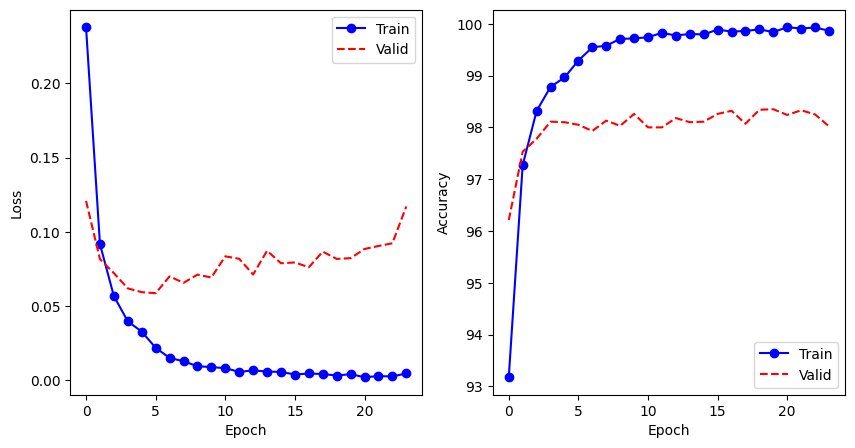

In [6]:
import matplotlib.pyplot as plt
fig=plt.figure(1,figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], 'bo-', label='Train')
plt.plot(history['valid_loss'], 'r--', label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], 'bo-', label='Train')
plt.plot(history['valid_acc'], 'r--', label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [7]:
modelSynScaL = mlp().cuda()
test_loss_min_SynScaL = np.Inf
LR=5e-4
optimizer = optim.Adam(modelSynScaL.parameters(), lr=LR)
test_acc_max_SynScaL = -100
historySynScaL = {'train_loss': [], 'valid_loss': [], 'train_acc': [], 'valid_acc': []}
for epoch in range(1, 25):
    print(f'Epoch {epoch} ...')
    # keep track of training and test loss
    train_loss = 0.0
    test_loss = 0.0
    train_correct = 0
    test_correct = 0
    train_total = 0
    test_total = 0
    #Changing the optimizer setting while training
    if epoch % 5 ==0:
      LR=LR*0.94
      optimizer = optim.Adam(modelSynScaL.parameters(), lr=LR)

    modelSynScaL.train()
    for data, target in tqdm(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = modelSynScaL(data)

        loss = F.cross_entropy(output, target)+ 1.0 * (0.1 - output.mean())**2
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*data.size(0)
        # update training accuracy
        _, predicted = torch.max(output.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()

    #validate
    modelSynScaL.eval()
    for data, target in tqdm(test_loader):
        # move tensors to GPU
        data, target = data.cuda(), target.cuda()
        # forward pass
        output = modelSynScaL(data)

        loss = F.cross_entropy(output, target) +  1.0 * (0.1 - output.mean())**2
        # update average validation loss
        test_loss += loss.item()*data.size(0)
        # update validation accuracy
        _, predicted = torch.max(output.data, 1)
        test_total += target.size(0)
        test_correct += (predicted == target).sum().item()

    # calculate average losses and accuracy
    train_loss = train_loss/len(train_loader.dataset)
    test_loss = test_loss/len(test_loader.dataset)
    train_acc = 100 * train_correct / train_total
    test_acc = 100 * test_correct / test_total

    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f} - Testing Loss: {:.6f} - Training Accuracy: {:.2f}% - Testing Accuracy: {:.2f}%'.format(
        epoch+1, train_loss, test_loss, train_acc, test_acc))

    # save model if validation loss has decreased
    if test_loss <= test_loss_min_SynScaL:
        print('Testing loss decreased ({:.6f} --> {:.6f}). The new model saved.'.format(test_loss_min_SynScaL, test_loss))
        torch.save(modelSynScaL.state_dict(), 'MNIST_SynScaL_MLP_leastLoss.pt')
        test_loss_min_SynScaL = test_loss
    if test_acc >= test_acc_max_SynScaL:
        print('Testing Acc increased ({:.6f} --> {:.6f}). The new model saved.'.format(test_acc_max_SynScaL, test_acc))
        torch.save(modelSynScaL.state_dict(), 'MNIST_SynScaL_MLP_Most_Accuracy.pt')
        test_acc_max_SynScaL = test_acc
    historySynScaL['train_loss'].append(train_loss)
    historySynScaL['valid_loss'].append(test_loss)
    historySynScaL['train_acc'].append(train_acc)
    historySynScaL['valid_acc'].append(test_acc)

Epoch 1 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 2 	Training Loss: 0.237198 - Testing Loss: 0.125057 - Training Accuracy: 93.20% - Testing Accuracy: 96.43%
Testing loss decreased (inf --> 0.125057). The new model saved.
Testing Acc increased (-100.000000 --> 96.430000). The new model saved.
Epoch 2 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 3 	Training Loss: 0.091975 - Testing Loss: 0.080518 - Training Accuracy: 97.25% - Testing Accuracy: 97.34%
Testing loss decreased (0.125057 --> 0.080518). The new model saved.
Testing Acc increased (96.430000 --> 97.340000). The new model saved.
Epoch 3 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 4 	Training Loss: 0.059289 - Testing Loss: 0.072110 - Training Accuracy: 98.29% - Testing Accuracy: 97.84%
Testing loss decreased (0.080518 --> 0.072110). The new model saved.
Testing Acc increased (97.340000 --> 97.840000). The new model saved.
Epoch 4 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 5 	Training Loss: 0.040962 - Testing Loss: 0.066806 - Training Accuracy: 98.78% - Testing Accuracy: 97.84%
Testing loss decreased (0.072110 --> 0.066806). The new model saved.
Testing Acc increased (97.840000 --> 97.840000). The new model saved.
Epoch 5 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 6 	Training Loss: 0.034080 - Testing Loss: 0.059753 - Training Accuracy: 99.04% - Testing Accuracy: 98.11%
Testing loss decreased (0.066806 --> 0.059753). The new model saved.
Testing Acc increased (97.840000 --> 98.110000). The new model saved.
Epoch 6 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 7 	Training Loss: 0.022956 - Testing Loss: 0.061948 - Training Accuracy: 99.37% - Testing Accuracy: 98.07%
Epoch 7 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 8 	Training Loss: 0.016686 - Testing Loss: 0.066452 - Training Accuracy: 99.56% - Testing Accuracy: 97.92%
Epoch 8 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 9 	Training Loss: 0.012652 - Testing Loss: 0.057255 - Training Accuracy: 99.67% - Testing Accuracy: 98.32%
Testing loss decreased (0.059753 --> 0.057255). The new model saved.
Testing Acc increased (98.110000 --> 98.320000). The new model saved.
Epoch 9 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 10 	Training Loss: 0.009802 - Testing Loss: 0.069595 - Training Accuracy: 99.78% - Testing Accuracy: 97.92%
Epoch 10 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 11 	Training Loss: 0.010995 - Testing Loss: 0.065796 - Training Accuracy: 99.71% - Testing Accuracy: 98.16%
Epoch 11 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 12 	Training Loss: 0.007572 - Testing Loss: 0.065202 - Training Accuracy: 99.83% - Testing Accuracy: 98.29%
Epoch 12 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 13 	Training Loss: 0.004982 - Testing Loss: 0.082813 - Training Accuracy: 99.92% - Testing Accuracy: 97.82%
Epoch 13 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 14 	Training Loss: 0.004657 - Testing Loss: 0.072197 - Training Accuracy: 99.91% - Testing Accuracy: 98.06%
Epoch 14 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 15 	Training Loss: 0.004990 - Testing Loss: 0.077214 - Training Accuracy: 99.90% - Testing Accuracy: 97.95%
Epoch 15 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 16 	Training Loss: 0.005934 - Testing Loss: 0.068679 - Training Accuracy: 99.86% - Testing Accuracy: 98.23%
Epoch 16 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 17 	Training Loss: 0.004201 - Testing Loss: 0.068125 - Training Accuracy: 99.91% - Testing Accuracy: 98.16%
Epoch 17 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 18 	Training Loss: 0.001556 - Testing Loss: 0.059786 - Training Accuracy: 100.00% - Testing Accuracy: 98.42%
Testing Acc increased (98.320000 --> 98.420000). The new model saved.
Epoch 18 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 19 	Training Loss: 0.001266 - Testing Loss: 0.059453 - Training Accuracy: 100.00% - Testing Accuracy: 98.46%
Testing Acc increased (98.420000 --> 98.460000). The new model saved.
Epoch 19 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 20 	Training Loss: 0.007317 - Testing Loss: 0.073975 - Training Accuracy: 99.78% - Testing Accuracy: 98.11%
Epoch 20 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 21 	Training Loss: 0.004392 - Testing Loss: 0.065280 - Training Accuracy: 99.92% - Testing Accuracy: 98.33%
Epoch 21 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 22 	Training Loss: 0.002509 - Testing Loss: 0.062630 - Training Accuracy: 99.96% - Testing Accuracy: 98.43%
Epoch 22 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 23 	Training Loss: 0.000811 - Testing Loss: 0.061908 - Training Accuracy: 100.00% - Testing Accuracy: 98.47%
Testing Acc increased (98.460000 --> 98.470000). The new model saved.
Epoch 23 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 24 	Training Loss: 0.000954 - Testing Loss: 0.058361 - Training Accuracy: 100.00% - Testing Accuracy: 98.51%
Testing Acc increased (98.470000 --> 98.510000). The new model saved.
Epoch 24 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 25 	Training Loss: 0.001041 - Testing Loss: 0.057536 - Training Accuracy: 100.00% - Testing Accuracy: 98.53%
Testing Acc increased (98.510000 --> 98.530000). The new model saved.


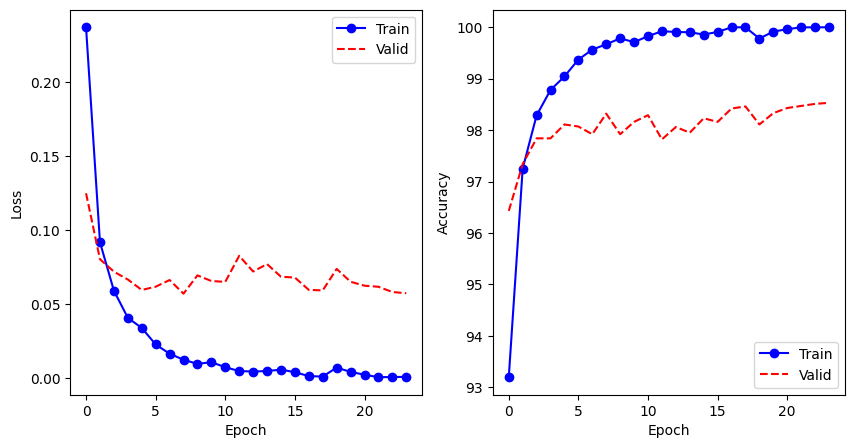

In [8]:
fig=plt.figure(1,figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(historySynScaL['train_loss'], 'bo-', label='Train')
plt.plot(historySynScaL['valid_loss'], 'r--', label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historySynScaL['train_acc'], 'bo-', label='Train')
plt.plot(historySynScaL['valid_acc'], 'r--', label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [9]:
def update_param(parameter_data, activation, gamma=0.1,mean = 0.1):
    activation = activation.data.numpy().mean(axis=(0)).squeeze()[:,None]
    param = parameter_data.numpy()
    new_param = param+gamma*np.clip((param*param)*(mean - activation).mean(),-1,1)
    return torch.from_numpy(new_param)
def perform_update(m):
    if type(m) == nn.Linear:
        m.eval()
        im = np.random.uniform(-1, 1, (100, m.in_features))+0.1
        im_as_ten = torch.from_numpy(im).float().cuda()
        x = Variable(im_as_ten, requires_grad=True)
        x = F.relu(m(x))
        m.weight.data = update_param(m.weight.data.cpu(),activation=x.cpu()).cuda()

In [10]:
modelSynScaW = mlp().cuda()
test_loss_min_SynScaW= np.Inf
test_acc_max_SynScaW = -100
LR=5e-4
optimizer = optim.Adam(modelSynScaW.parameters(), lr=LR)
historySynScaW = {'train_loss': [], 'valid_loss': [], 'train_acc': [], 'valid_acc': []}
for epoch in range(1, 25):
    print(f'Epoch {epoch} ...')
    # keep track of training and test loss
    train_loss = 0.0
    test_loss = 0.0
    train_correct = 0
    test_correct = 0
    train_total = 0
    test_total = 0
    #Changing the optimizer setting while training
    if epoch % 5 ==0:
      LR=LR*0.94
      optimizer = optim.Adam(modelSynScaW.parameters(), lr=LR)

    modelSynScaW.train()
    for data, target in tqdm(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = modelSynScaW(data)

        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*data.size(0)
        # update training accuracy
        _, predicted = torch.max(output.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()
    modelSynScaW.apply(perform_update)
    #validate
    modelSynScaW.eval()
    for data, target in tqdm(test_loader):
        # move tensors to GPU
        data, target = data.cuda(), target.cuda()
        # forward pass
        output = modelSynScaW(data)

        loss = F.cross_entropy(output, target)
        # update average validation loss
        test_loss += loss.item()*data.size(0)
        # update validation accuracy
        _, predicted = torch.max(output.data, 1)
        test_total += target.size(0)
        test_correct += (predicted == target).sum().item()

    # calculate average losses and accuracy
    train_loss = train_loss/len(train_loader.dataset)
    test_loss = test_loss/len(test_loader.dataset)
    train_acc = 100 * train_correct / train_total
    test_acc = 100 * test_correct / test_total

    # print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f} - Testing Loss: {:.6f} - Training Accuracy: {:.2f}% - Testing Accuracy: {:.2f}%'.format(
        epoch+1, train_loss, test_loss, train_acc, test_acc))

    # save model if validation loss has decreased
    if test_loss <= test_loss_min_SynScaW:
        print('Testing loss decreased ({:.6f} --> {:.6f}). The new model saved.'.format(test_loss_min_SynScaW, test_loss))
        torch.save(modelSynScaW.state_dict(), 'MNIST_SynScaW_MLP_leastLoss.pt')
        test_loss_min_SynScaW = test_loss
    if test_acc >= test_acc_max_SynScaW:
        print('Testing Acc increased ({:.6f} --> {:.6f}). The new model saved.'.format(test_acc_max_SynScaW, test_acc))
        torch.save(modelSynScaW.state_dict(), 'MNIST_SynScaW_MLP_Most_Accuracy.pt')
        test_acc_max_SynScaW = test_acc
    historySynScaW['train_loss'].append(train_loss)
    historySynScaW['valid_loss'].append(test_loss)
    historySynScaW['train_acc'].append(train_acc)
    historySynScaW['valid_acc'].append(test_acc)

Epoch 1 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 2 	Training Loss: 0.239026 - Testing Loss: 0.120151 - Training Accuracy: 93.08% - Testing Accuracy: 96.30%
Testing loss decreased (inf --> 0.120151). The new model saved.
Testing Acc increased (-100.000000 --> 96.300000). The new model saved.
Epoch 2 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 3 	Training Loss: 0.092456 - Testing Loss: 0.087860 - Training Accuracy: 97.27% - Testing Accuracy: 97.33%
Testing loss decreased (0.120151 --> 0.087860). The new model saved.
Testing Acc increased (96.300000 --> 97.330000). The new model saved.
Epoch 3 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 4 	Training Loss: 0.059910 - Testing Loss: 0.069919 - Training Accuracy: 98.17% - Testing Accuracy: 97.75%
Testing loss decreased (0.087860 --> 0.069919). The new model saved.
Testing Acc increased (97.330000 --> 97.750000). The new model saved.
Epoch 4 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 5 	Training Loss: 0.040655 - Testing Loss: 0.068327 - Training Accuracy: 98.77% - Testing Accuracy: 97.89%
Testing loss decreased (0.069919 --> 0.068327). The new model saved.
Testing Acc increased (97.750000 --> 97.890000). The new model saved.
Epoch 5 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 6 	Training Loss: 0.033369 - Testing Loss: 0.064401 - Training Accuracy: 98.92% - Testing Accuracy: 98.06%
Testing loss decreased (0.068327 --> 0.064401). The new model saved.
Testing Acc increased (97.890000 --> 98.060000). The new model saved.
Epoch 6 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 7 	Training Loss: 0.021555 - Testing Loss: 0.068049 - Training Accuracy: 99.34% - Testing Accuracy: 98.04%
Epoch 7 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 8 	Training Loss: 0.016426 - Testing Loss: 0.065897 - Training Accuracy: 99.51% - Testing Accuracy: 98.08%
Testing Acc increased (98.060000 --> 98.080000). The new model saved.
Epoch 8 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 9 	Training Loss: 0.013273 - Testing Loss: 0.069548 - Training Accuracy: 99.59% - Testing Accuracy: 98.05%
Epoch 9 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 10 	Training Loss: 0.010336 - Testing Loss: 0.063571 - Training Accuracy: 99.72% - Testing Accuracy: 98.36%
Testing loss decreased (0.064401 --> 0.063571). The new model saved.
Testing Acc increased (98.080000 --> 98.360000). The new model saved.
Epoch 10 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 11 	Training Loss: 0.011434 - Testing Loss: 0.077041 - Training Accuracy: 99.64% - Testing Accuracy: 97.98%
Epoch 11 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 12 	Training Loss: 0.005671 - Testing Loss: 0.063746 - Training Accuracy: 99.83% - Testing Accuracy: 98.40%
Testing Acc increased (98.360000 --> 98.400000). The new model saved.
Epoch 12 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 13 	Training Loss: 0.006579 - Testing Loss: 0.075122 - Training Accuracy: 99.78% - Testing Accuracy: 98.04%
Epoch 13 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 14 	Training Loss: 0.007624 - Testing Loss: 0.075910 - Training Accuracy: 99.73% - Testing Accuracy: 98.14%
Epoch 14 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 15 	Training Loss: 0.003956 - Testing Loss: 0.078249 - Training Accuracy: 99.89% - Testing Accuracy: 98.09%
Epoch 15 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 16 	Training Loss: 0.005390 - Testing Loss: 0.076486 - Training Accuracy: 99.81% - Testing Accuracy: 98.29%
Epoch 16 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 17 	Training Loss: 0.003641 - Testing Loss: 0.081863 - Training Accuracy: 99.89% - Testing Accuracy: 98.12%
Epoch 17 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 18 	Training Loss: 0.003617 - Testing Loss: 0.083980 - Training Accuracy: 99.89% - Testing Accuracy: 98.17%
Epoch 18 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 19 	Training Loss: 0.005319 - Testing Loss: 0.084107 - Training Accuracy: 99.83% - Testing Accuracy: 98.21%
Epoch 19 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 20 	Training Loss: 0.003516 - Testing Loss: 0.084272 - Training Accuracy: 99.89% - Testing Accuracy: 98.29%
Epoch 20 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 21 	Training Loss: 0.004595 - Testing Loss: 0.092402 - Training Accuracy: 99.84% - Testing Accuracy: 98.19%
Epoch 21 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 22 	Training Loss: 0.002516 - Testing Loss: 0.081226 - Training Accuracy: 99.92% - Testing Accuracy: 98.35%
Epoch 22 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 23 	Training Loss: 0.002689 - Testing Loss: 0.097453 - Training Accuracy: 99.91% - Testing Accuracy: 98.24%
Epoch 23 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 24 	Training Loss: 0.004253 - Testing Loss: 0.078836 - Training Accuracy: 99.85% - Testing Accuracy: 98.39%
Epoch 24 ...


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 25 	Training Loss: 0.003631 - Testing Loss: 0.097576 - Training Accuracy: 99.89% - Testing Accuracy: 98.10%


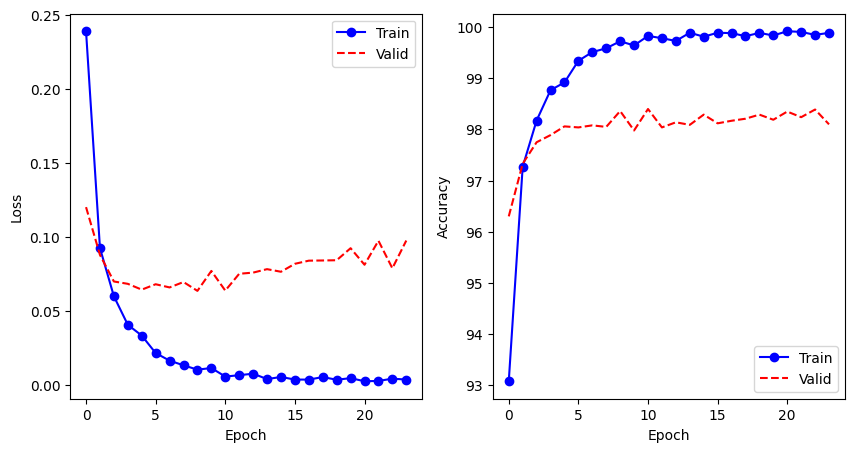

In [11]:

import matplotlib.pyplot as plt
fig=plt.figure(1,figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(historySynScaW['train_loss'], 'bo-', label='Train')
plt.plot(historySynScaW['valid_loss'], 'r--', label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historySynScaW['train_acc'], 'bo-', label='Train')
plt.plot(historySynScaW['valid_acc'], 'r--', label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [12]:
from tabulate import tabulate
data = [['Loss', test_loss_min, test_loss_min_SynScaL, test_loss_min_SynScaW],
['Accuracy', test_acc_max, test_acc_max_SynScaL, test_acc_max_SynScaW],
]
print (tabulate(data, headers=["Type", "Normal", "SynScaL", "SynScaW"]))

Type          Normal     SynScaL     SynScaW
--------  ----------  ----------  ----------
Loss       0.0587405   0.0572553   0.0635707
Accuracy  98.35       98.53       98.4
